# 1 动手学高等数学

## 1.1 关于导数的最优解问题

* 引入：GitModel 公司发明了一种专用于数值计算的平板电脑 GitNum 考虑到员工生产效率的问题 GitNum 的生产成本是与生产台数相关的. 函数关系为：
$$C(n) = 1250n(2-e^{-(n-5000)^2}).$$  

问如何确定这批 GitNum 的生产台数$n$使得每台的**平均生产成本最小**经济效益最大呢?
* 分析：该问题的本质即如何权衡生产台数使生产成本之间的关系。由平均成本的定义知平均成本$\bar{C}(n) = \frac{C(n)}{n}$。因此，$\bar{C(n)}$既是要寻找的目标函数。接下来，只要找到合适的$n$，解出$min(\bar{C}(n))$，即返回该问题的答案。
* 引出：由分析可知，该问题是一元函数极值问题。

**命题1.1.1**：[一阶最优化必要条件] 设函数$f(x)$在其定义域$\bf{R}$上可导，且$x_{0}\in \bf{R}$是函数$f$的极值点，则
$$f^{'}(x_{0}) = 0.$$ 
其中，$f^{'}$和$f^{''}$分别表示函数f的一阶导数和二阶导数。

**命题1.1.2**：[二阶最优化必要条件]设函数$f(x)$在其定义域$\bf{R}$上可导，$x_{0}\in \bf{R}$是函数$f$的极值点，且函数$f$二阶可导，则

$$若x_{0}是函数f的极小值点， f^{''} \ge 0.$$
$$若x_{0}是函数f的极大值点， f^{''} \le 0.$$

**命题1.1.3**：[二阶最优化充分条件]设函数$f(x)$在其定义域$\bf{R}$上二阶可导，且$f^{'}(x_{0})=0$，若$x_{0}\in \bf{R}$满足
$$f^{''} > 0, 则x_{0}是函数f(x)的极小值点。$$
$$f^{''} < 0, 则x_{0}是函数f(x)的极大值点。$$

python代码

In [308]:
import matplotlib.pyplot as plt
from sympy import *
import numpy as np

n = symbols('n')    # 将 n 定义为一个变量
# 定义平均成本函数
def avg_c(x):
    return 1250 * (2 - exp(-(x - 5000) ** 2))

# 求一阶导
df1 = diff(avg_c(n), n)
print(df1)

-1250*(10000 - 2*n)*exp(-(n - 5000)**2)


In [309]:
# 求驻点， 令 df1 = 0
x0 = solve(df1, n)
print(x0)

[5000]


In [310]:
# 求二阶导，判断df2(x0) >=? 0，即x0是否是函数avg_c的极小值
df2 = diff(df1, n)
print(df2.evalf(subs={n:x0[0]}))
print(df2.evalf(subs={n:x0[0]}) >= 0)

2500.00000000000
True


In [311]:
# 可以看出，avg_c的二阶导数在驻点x0处的取值是大于0的，即avg_c在此处取得极小值
min_c = avg_c(x0[0])
print("当生产台数为：{} 台时，平均成本最小，为：{} ￥".format(x0[0], min_c))

当生产台数为：5000 台时，平均成本最小，为：1250 ￥


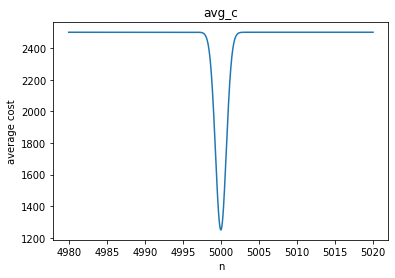

In [312]:
# 接下来通过画出函数avg_c图像，可以直观地看出极小值的大概位置
x = np.linspace(4980, 5020, 10000)
y = 1250 * (2 - np.exp(- (x - 5000) ** 2))
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('average cost')
plt.title('avg_c')
plt.show()

**推广** ：由一元最优解问题可以推广到多元最优解问题。此外，不难想到还有*带约束条件*的最优解问题，可以应用拉格朗日乘数法进行求解。
* 实例：GitModel 公司通过 GitNum 的发售赚到第一桶金后马不停蹄地投入到 GitNum 的改良研制中 经市场调查后 GitModel 公司发现根据用户需求可推出轻便版以及高性能版的 GitNum. 三种 GitNum:
<style>
table
{
    margin: auto;
}
</style>

|型号|售价|成本函数|
|:---:|:---:|:---:|
|GitNum Mini|$q_{1} = 2000$|$C_{1}(n)=750n(2-e^{-(n-6000)**2})$|
|GitNum 标准版|$q_{2} = 3000$|$C_{2}(n)=1250n(2-e^{-(n-5000)**2})$|
|GitNum Pro|$q_{2} = 4500$|$C_{3}(n)=2000n(2-e^{-(n-3000)**2})$|

问在这一批生产中 GitModel 公司应该如何计划三种 GitNum 的生产台数才能使得利润与成本的比值最大化?

* 分析：由题意可以，解决该问题需要求出生产三种不同型号的台数，从而得出最大的利润与成本比值。设$R$为总收入，$Q$为利润，$C$为成本，$n_{i}, i \in {1,2,3}$分别为对应型号的生产台数。目标函数为：$f=\frac{Q}{C}$, 其中
$$R=q_{1}n_{1}+q_{2}n_{2}+q_{3}n_{3}\\
C=C_{1}(n_{1})+C_{2}(n_{2})+C_{3}(3)\\
Q=R-C$$
只要找到合适的$n_{1}, n_{2}, n_{2}$, 解出$max(f)$,即可解决问题。

* 引出：显然，这是一个多元函数的最优解问题。

**Hesse矩阵定义**：设$f:\bf{R}^{n} \longrightarrow \bf{R}$是$n$元函数，$x_{i}, i=1,2,3,\cdots,n$是变量，记$f$对变量$x_{i}$方向的偏导数$f_{i}^{'}$，称所有偏导数组成的列向量$[f_{1}^{'}, f_{2}^{'}, \cdots, f_{n}^{'}]^{T}:=\bigtriangledown f$，为函数$f$的全导数，亦称**梯度**，记偏导数$f_{i}^{'}$对变量$x_{j}$方向的二阶偏导数为$f_{ij}^{''}$。则称

$$\left[\begin{array}{cccc}
f_{11}^{\prime \prime} & f_{12}^{\prime \prime} & \cdots & f_{1 n}^{\prime \prime} \\
f_{21}^{\prime \prime} & f_{22}^{\prime \prime} & \cdots & f_{1 n}^{\prime \prime} \\
\vdots & \vdots & \ddots & \vdots \\
f_{n 1}^{\prime \prime} & f_{n 2}^{\prime \prime} & \cdots & f_{n n}^{\prime \prime}
\end{array}\right]:=\nabla^{2} f$$

为函数$f$的**Hesse矩阵**。

**命题1.1.4**：[多元无约束问题一阶最优化必要条件]设函数$f(x)$是 $\bf{R}^{n}$ 上的$n$元可导函数，若 $x^{*}$ 是$f$的极值点，则
$$\bigtriangledown f(x^{*})=0.$$
其中，$\bigtriangledown f$ 是$f$的梯度。

**命题1.1.5**：[多元无约束问题二阶最优化必要条件]设函数$f(x)$是$\bf{R}^{n}$上的$n$元二阶可导函数，可得
$$若x^{*}是f的极大值，则\bigtriangledown f(x^{*})=0，\bigtriangledown ^{2} f(x^{*})半负定。$$
$$若x^{*}是f的极小值，则\bigtriangledown f(x^{*})=0，\bigtriangledown ^{2} f(x^{*})半正定。$$
其中，$\bigtriangledown ^{2} f$为$f$的$Hesse$矩阵。

**命题1.1.6**：[多元无约束问题二阶最优化充分条件]设函数$f(x)$是 $\bf{R}^{n}$ 上的$n$元可导函数，若 $x^{*}$满足
$$\bigtriangledown f(x^{*})=0，\bigtriangledown ^{2} f(x^{*})半负定，则x^{*}是f的极大值。$$
$$\bigtriangledown f(x^{*})=0，\bigtriangledown ^{2} f(x^{*})半正定，则x^{*}是f的极小值。$$

python代码

In [313]:
# 设变量，建立目标函数
n1, n2, n3 = symbols('n1, n2, n3')
n = []
n.append(n1)
n.append(n2)
n.append(n3)
q1, q2, q3 = 2000, 3000, 4500
R = n[0]*q1 + n[1]*q2 + n[2]*q3
C1 = 750*n[0]*(2-exp(-(n[0]-6000) ** 2))
C2 = 1250*n[1]*(2-exp(-(n[1]-5000) ** 2))
C3 = 2000*n[2]*(2-exp(-(n[2]-3000) ** 2))
C = C1 + C2 + C3
Q = R - C
f = Q / C
print(f)

(-750*n1*(2 - exp(-(n1 - 6000)**2)) + 2000*n1 - 1250*n2*(2 - exp(-(n2 - 5000)**2)) + 3000*n2 - 2000*n3*(2 - exp(-(n3 - 3000)**2)) + 4500*n3)/(750*n1*(2 - exp(-(n1 - 6000)**2)) + 1250*n2*(2 - exp(-(n2 - 5000)**2)) + 2000*n3*(2 - exp(-(n3 - 3000)**2)))


In [314]:
# 令各偏导数等于0，求驻点n_1,n_2,n_3
dfn1 = diff(f, n[0])
dfn2 = diff(f, n[1])
dfn3 = diff(f, n[2])
# 千万不要运行以下代码，不然你会后悔，时间究极究极长。。。
# 这时候通过高数知识直接求解过于困难，不过不要烦恼，近似解来帮助你
#n_1 = solve(dfn1, n[0], n[1], n[2])

In [315]:
# 近似解由scipy.optimize 包提供，
import scipy.optimize as opt

def func0(cost, x, a):
    return cost*x*(2 - exp(-(x - a)**2))
func = lambda x: (2000*x[0] + 3000*x[1] + 4500*x[2]) / (func0(750, x[0], 6000) + func0(1250, x[1], 5000) + func0(2000, x[2], 3000)) - 1 
bnds = ((1, 10000), (1, 10000), (1, 10000))
res = opt.minimize(fun=func, x0=np.array([2, 1, 1]), bounds=bnds)
res

      fun: 0.126003403677694
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00062412,  0.00037126, -0.00000804])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 64
      nit: 15
     njev: 16
   status: 0
  success: True
        x: array([  1.       ,   1.       , 123.5759835])

## 1.2 关于插值方法的数据处理




* 引入：GitModel 公司工作室刚刚建完，准备安装宽带以及路由，基于传输数据要求，GitModel 需要的宽带运营商网速越快越好，而由于网速是一个随时间变化的非固定量，简单衡量平均网速也并非一个好的评价手段, GitModel 准备收集在同一个地点各个运营商的宽带一天内的网速数据以做接下来的建模分析, 出于人力考虑,网速监视每小时汇报一次数据. A运营商的宽带24小时网速如下表:
<div align=center> 

![](figures/01.JPG) 



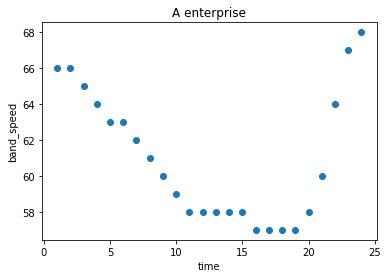

In [316]:
# 将表格转换为图片
time_gap = np.linspace(1, 24, 24)
band_speed = np.array([66, 66, 65, 64, 63, 63, 62, 61, 60, 59, 58, 58, 58, 58, 58, 57, 57, 57, 57, 58, 60, 64, 67, 68])
plt.scatter(time_gap, band_speed)
plt.xlabel('time')
plt.ylabel('band_speed')
plt.title('A enterprise')
plt.show()

* 问题：注意到图片中离散的数据点无法完美体现网速的整体性质 我们需要通过仅有的数据点还原宽带一天内的实时网速. 以A运营商为例 请问 GitModel 公司应如何模拟出网速曲线呢?

* 分析：要将该离散点拟合成一条连续的曲线，需要用到插值方法。拟合包括一次拟合（又称直线拟合）和$n（n > 1）$次拟合。其中3次曲线拟合是最常用的拟合方法，因为它使得最终拟合成的曲线2次可导，即有利于后面的求解分析。

**插值定义**：设$(x_{i}, y_{i}), i=1,2, \cdots, n$是$\bf{R}^{2}$的n个点，$f:\bf{r} \longrightarrow \bf{R}$是一条满足$y_{i}=f(x_{i}), i=1,2, \cdots, n$的函数曲线，则$f$称为$(x_{i}, y_{i})$的插值曲线。

**三次样条插值定义**：设 $(x_i,y_i),i=1,2,\cdots,n$ 是 $\mathbf{R}^2$ 上的 $n$ 个点$,$ 其三次样条插值函数为
$$f_i(t)=s_{i,0}+s_{i,1}t+s_{i,2}t^2+s_{i,3}t^3,i=1,2,\\cdots, n-1,$$
满足
\begin{align*}
f_{i}(x_i)&=y_i,i=1,2,\cdots,n-1,f_{n-1}(x_{n})=y_{n}\\
f_{i}(x_{i+1})&=y_{i+1}(x_{i+1}),i=1,2,\cdots,n-2\\
f_{i}'(x_{i+1})&=y_{i+1}'(x_{i+1}),i=1,2,\cdots,n-2\\
f_{i}''(x_{i+1})&=y_{i+1}''(x_{i+1}),i=1,2,\cdots,n-2.
\end{align*}
<div align=center>

![](figures/02.JPG)

* 引出：scipy.interpolate包提供了各种插值函数。

python代码

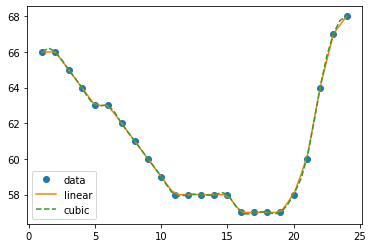

In [317]:
import scipy.interpolate as inter

f1 = inter.interp1d(time_gap, band_speed)  # 一次插值拟合
f3 = inter.interp1d(time_gap, band_speed, kind='cubic')  # 三次样条插值
xnew = np.linspace(1,24, 48)
plt.plot(time_gap, band_speed, 'o', xnew, f1(xnew), '-', xnew, f3(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

## 1.3 关于积分的求解问题




* 引入：鉴于 GitModel 公司刚上市$,$ 承接了许多数学建模相关业务. 有一家工程企业给出了这样一个任务 : 该企业准备制造一批抽水机$,$ 需要得到其各种数据来决定抽水机的性能参数. 企业首先对圆柱形的储水桶进行了抽水测试$,$ 需要求出将桶内的水全部抽出需要做多少功？储水桶的数据如下 : 高 $5\mathrm{m}$ $,$ 底面圆半径 $3\mathrm{m}$:

<div align=center>

![](figures/03.JPG)




* 问题：问将桶内的全部抽出抽水机做了多少功？

* 分析：根据大学学过的高数知识可知，利用微元法可轻松对问题进行求解。

<div align=center>

![](figures/04.JPG)

**第一型曲线积分的计算方式**：设平面曲线 $L$ 的参数方程为 $x=x(t),z=z(t),t\in [a,b],$ $\rho(x,z)$ 为定义在 $L$ 上的连续函数$,$ 则
$$\displaystyle\int_{L}\rho(x,z)d s=\displaystyle\int_{a}^b\rho(x(t),z(t))\sqrt{(x'(t))^2+(z'(t))^2}d t.$$
除了直线积分和曲线积分， 还有平面积分以及曲面积分，事实上，由于我们还会接触变力曲线做功 ，这代表在每个点上的分布函数不再是标量函数而是向量函数! 分析学还给出了第二类曲线积分以及曲面积分.
<div align=center>

![](figures/05.JPG)


* 引出：scipy.integrate包提供了计算积分的各种函数。

python代码

In [318]:
import scipy.integrate as inte

def x(h):
    return 88.2*pi*(5 - h)

result = inte.quad(x, 0, 5)
result   # 返回的结果为积分值和被积分区间

(3463.605900582747, 3.8453750190545164e-11)

## 1.4 实战：人口增长问题


* 问题：GitModel 公司对面试的实习生给出了这样一个问题 : 搜集 $1950\sim 2020$ 年间美国人口数据$,$ 猜测其满足的函数关系$,$ 并综合数据预测美国 $2030$ 年的人口数.公司希望实习生就以下的<strong>开放性</strong>问题给出自己的想法，公司要求实习生<strong>提交预测的思路$,$ 模型$,$ 算法以及结果</strong>.
面试官给出了如下提示 : 预测值与真实值存在误差$,$ 该问题如何转化为可用上述所学的知识解决的问题呢?

* 数据收集：通过上网搜索，获取美国人$1950到2020年$的人口数据如下表所示。
<style>
table
{
    margin: auto;
}
</style>
|$\bf{年份}$|$\bf{人口数}$|$\bf{年份}$|$\bf{人口数}$|$\bf{年份}$|$\bf{人口数}$|$\bf{年份}$|$\bf{人口数}$|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1950|151,684,000|1971|207,661,000|1992|256,514,000|2013|316,060,000|
|1951|154,287,000|1972|209,896,000|1993|259,919,000|2014|318,386,000|
|1952|156,954,000|1973|211,909,000|1994|263,126,000|2015|320,739,000|
|1953|159,565,000|1974|213,854,000|1995|266,278,000|2016|323,072,000|
|1954|162,391,000|1975|215,973,000|1996|269,394,000|2017|325,122,000|
|1955|165,275,000|1976|218,035,000|1997|272,657,000|2018|326,838,000|
|1956|168,221,000|1977|220,239,000|1998|275,854,000|2019|328,330,000|
|1957|171,274,000|1978|222,585,000|1999|279,040,000|2020|329,484,000|
|1958|174,141,000|1979|225,055,000|2000|282,162,000|||
|1959|177,622,000|1980|227,225,000|2001|284,969,000|||
|1960|180,671,000|1981|229,466,000|2002|287,625,000|||
|1961|183,691,000|1982|231,664,000|2003|290,108,000|||
|1962|186,538,000|1983|233,792,000|2004|292,805,000|||
|1963|189,242,000|1984|235,825,000|2005|295,517,000|||
|1964|191,889,000|1985|237,924,000|2006|298,380,000|||
|1965|194,303,000|1986|240,133,000|2007|301,231,000|||
|1966|196,560,000|1987|242,289,000|2008|304,094,000|||
|1967|198,712,000|1988|244,499,000|2009|306,772,000|||
|1968|200,706,000|1989|246,819,000|2010|309,327,000|||
|1969|202,677,000|1990|249,623,000|2011|311,583,000|||
|1970|205,052,000|1991|252,981,000|2012|313,878,000|


> 数据来源：
> - [美国人口历年数据](https://population.gotohui.com/pdata-3410)
> - [20 世纪 50 年代以来美国人口变化特征及其对中国的启示](extension://bfdogplmndidlpjfhoijckpakkdjkkil/pdf/viewer.html?file=http%3A%2F%2Fwww.shehui.pku.edu.cn%2Fupload%2Feditor%2Ffile%2F20220330%2F20220330104520_1460.pdf)
> - [United Stated Census](https://www.census.gov/data/tables/time-series/dec/density-data-text.html)
> - [美国历年人口](https://www.bilibili.com/read/cv16279064)

* 数据分析：单从表格来看，只能看出美国每年的人口都在增加，但其服从何种规律，肉眼很难看出，因此，首先将数据可视化以寻求人口增长规律。

In [319]:
import pandas  as pd

In [320]:
population = pd.read_excel('美国人口.xlsx', sheet_name='Sheet1')
population

,年份,人口数量
0,2020,329484000
1,2019,328330000
2,2018,326838000
3,2017,325122000
4,2016,323072000
...,...,...
66,1954,162391000
67,1953,159565000
68,1952,156954000
69,1951,154287000


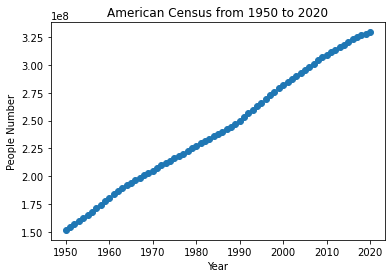

In [321]:
years = population['年份']
people_num = population['人口数量']
plt.scatter(years, people_num)
plt.xlabel('Year')
plt.ylabel('People Number')
plt.title('American Census from 1950 to 2020')
plt.show()

* 模型建立：从上面美国人口与年份的关系可以做简单假设，美国的人口数与年份满足线性关系，然后为美国人口和年份建立线性模型。

设线性方程 $y_{i} = wx_{i}+b+\epsilon, i \in [0, 2020-1950], \epsilon \sim N(0, 1)$，其中，$y_{i}$表示美国第$x_{i}$年的人口总数。$\epsilon$表示预测误差。则美国第$x_{i}$年的人口预测为
$$\hat{y}_{i} = wx_{i}+b, i \in [0, 2020-1950]$$
预测误差为：
$$\epsilon = y_{i}-\hat{y}_{i}$$


* 模型求解：对于建立的线性方程，只需要拟合出最优的 $w^{*}和b^{*}$，使得$\bf{\epsilon}=\bf{y} - \bf{\hat{y}}$(预测误差)的值最小，即可得出模型的解。数学表述为：

\begin{aligned}
\mathop{\mathbb{argmin}}_{w^{*},b^{*}}|\bf{y} - \bf{\hat{y}}| &  
=\mathop{\mathbb{argmin}}_{w^{*},b^{*}}(\bf{y} - \bf{\hat{y}})^{2}  \\
&=\mathop{\mathbb{argmin}}_{w^{*},b^{*}}\sum_{i} (y_{i} - \hat{y}_{i})^{2} \\
&= \mathop{\mathbb{argmin}}_{w^{*},b^{*}}\sum_{i} (y_{i} - wx_{i}-b)^{2}
\end{aligned}



取目标函数：$\epsilon = \sum (y_{i}-wx_{i}-b)^{2}$
该问题便转化为关于导数的最优化问题（二元函数）。
根据多元微分知识，令$\frac{\partial \epsilon}{\partial w}$和$\frac{\partial \epsilon}{\partial b}$为 0。求出驻点，然后计算函数的Hssen矩阵，找出函数取极小值时的驻点。最后求出 $w, b$，并将求解好的模型应用到新数据，测试结果。
* 计算过程：
令
$$\frac{\partial \epsilon}{\partial w} = -2 \sum(y_{i} - wx_{i} -b)x_{i}=0$$
$$\frac{\partial \epsilon}{\partial b} = -2 \sum(y_{i} - wx_{i} -b)=0$$
解得

 $$w = 2563602.590816,   b = -4846523452.723654$$

所求模型为：
$$y = 2563602.590816x-4846523452.723654$$

python 代码

In [322]:
# w = x[0], b = x[1]
def epsilons(x):
    return sum((yi- x[0] * xi -x[1]) ** 2 for yi, xi in zip(people_num, years))

In [323]:
# 为方便，直接使用scipy.optimize包中的minimize函数求该函数的近似解
res = opt.minimize(epsilons, x0=np.array([0, 0]), method="nelder-mead")
print("w:{:f}, b:{:f}".format(res.x[0], res.x[1]))

w:2563602.587207, b:-4846523445.458313


In [324]:
# 根据计算结果得出模型的解
x = symbols('x')
y = res.x[0] * x + res.x[1]
y

2563602.58720681*x - 4846523445.45831

C:\Users\13541\AppData\Local\Temp\ipykernel_26680\2009934315.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  z = np.sum((yi- W * xi -B) ** 2 for yi, xi in zip(people_num, years))
C:\Users\13541\AppData\Local\Temp\ipykernel_26680\2009934315.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


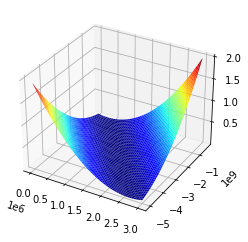

In [325]:
# 绘制出3-D图像可以更直观地看出结果。
import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(20000, 3000000, 1000)
b = np.linspace(-5000000000, -400000000, 1000)
W,B = np.meshgrid(w,b)

z = np.sum((yi- W * xi -B) ** 2 for yi, xi in zip(people_num, years))

#绘制曲面图
fig = plt.figure()
ax = plt.gca(projection='3d')
ax.plot_surface(W,B,z,cmap='jet')
plt.show()

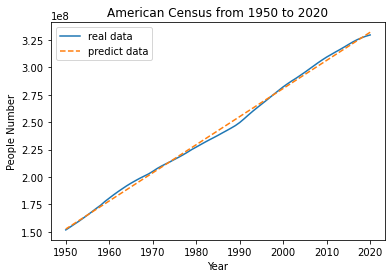

In [326]:
# 最后，将拟合的模型对应到真实的数据中
def y__(x):
    return res.x[0] * x + res.x[1]
y_pre = y__(years)
plt.plot(years, people_num, '-', years, y_pre, '--')
plt.xlabel('Year')
plt.ylabel('People Number')
plt.title('American Census from 1950 to 2020')
plt.legend(['real data', 'predict data'])
plt.show()

最后将模型用于新数据的预测，测试模型的预测效果.
**这里给出2021年和2022年的美国人口数据（未被拟合的数据）：331761000，332213000**

In [327]:
# 预测2020年和2021年的美国人口
year_2020 = y.evalf(subs={x:2020})
year_2021 = y.evalf(subs={x:2021})
print(year_2020)
print(331761000)
print("美国2020年的人口总数预测结果为为：{:.0f}，与实际值的误差为：{:.0f}".format(year_2020, np.abs(year_2020-331761000.0)))
print("美国2021年的人口总数预测结果为为：{:.0f}，与实际值的误差为：{:.0f}".format(year_2021, np.abs(year_2021-332213000)))
# 预测美国2030年人口总数
year_2030 = y.evalf(subs={x:2030})
print("美国2030年的人口总数预测结果为为：{:.0f}。".format(year_2030))

331953780.699434
331761000
美国2020年的人口总数预测结果为为：331953781，与实际值的误差为：192781
美国2021年的人口总数预测结果为为：334517383，与实际值的误差为：2304383
美国2030年的人口总数预测结果为为：357589807。


* 结果分析：从结果来看，误差达到了10w级，说明该方法确实过于简单。

> 参考资料
> - [如何理解最小二乘法](https://blog.csdn.net/ccnt_2012/article/details/81127117)
> - [最小二乘公式推导](https://blog.csdn.net/qq_45717425/article/details/120665970)
> - [scipy参考文档](https://docs.scipy.org/doc/scipy/tutorial/optimize.html#)
> - [sympy参考文档](https://docs.sympy.org/latest/tutorial/intro.html)
> - [numpy参考文档](https://numpy.org/doc/stable/user/quickstart.html)
> - [matplotlib参考文档](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

## 1.4 扩展

显然，只要稍微动一下脑袋，便可知道上述方法的模型假设是不够严谨地，因为年份只是一种表示年的方法，它与人口数没有必然的联系。那么，就是说，该模型稳定度不高。那么，我们就需要对模型进行改进，仔细考虑一下，当年的人口数应该和前一年或者前几年的人口基数是相关的。

为简单，我们假设当年的人口数与上一年的人口数满足线性关系。

于是，我们便有了一个新的人口预测模型：
设$y_{i}$表示第$i$个年份的人口总数，$y_{i-1}$表示第$(i-1)$个年份的人口总数。且$y_{i}$和$y_{i-1}$满足
\begin{aligned}
y_{i} = wy_{i-1} + b + \epsilon
\end{aligned}
其中 $i \in [1, 2020-1950], \epsilon \sim N(0, 1)$。

取目标函数：
$$\epsilon = \sum_{i} {(y_{i} - wy_{i-1} - b)^{2}}$$
求解方法和上一个模型类似。

这里直接给出python代码

In [328]:
people_num

0     329484000
1     328330000
2     326838000
3     325122000
4     323072000
        ...    
66    162391000
67    159565000
68    156954000
69    154287000
70    151684000
Name: 人口数量, Length: 71, dtype: int64

people_num是按照年份逆序存储在dataframe中的，需要将其顺序反转一下，以便于模型参数提供。

In [329]:
before_year = people_num[1:]
this_year = people_num[0:-1] 
b_year = np.zeros(len(before_year))
t_year = np.zeros(len(this_year))

In [330]:
for i in range(len(before_year)):
    b_year[i] = before_year[len(before_year) -i]
    t_year[i] = this_year[len(this_year) - i - 1]

In [331]:
def discrepance(x):
    return sum((yi - x[0]*yi_1 - x[1]) ** 2 for yi, yi_1 in zip(this_year, before_year))

In [332]:
res = opt.minimize(discrepance, x0=[0, 0], method='nelder-mead')
print("w: {}, b: {}".format(res.x[0], res.x[1]))

w: 0.9983868941977458, b: 2928728.1157275736


In [333]:
# 得出模型
yi_1 = symbols('yi_1')
y_p = res.x[0] * yi_1 + res.x[1]
y_p

0.998386894197746*yi_1 + 2928728.11572757

In [335]:
# 验证2021年和2022年，并预测2030年
y_2021 = y_p.evalf(subs={yi_1:people_num[0]})
print("美国2021年的人口预测为：{:.0f}， 与真实人口的误差为：{:.0f}".format(y_2021, np.abs(y_2021 - 331761000.0)))
y_2022 = y_p.evalf(subs={yi_1:y_2021})
print("美国2022年的人口预测为：{:.0f}， 与真实人口的误差为：{:.0f}".format(y_2022, np.abs(y_2022 - 332213000)))
temp = y_2022
for i in range(8):
    temp = y_p.evalf(subs={yi_1:temp})
    print("美国{}年的人口预测为：{:.0f}。".format((2022+i+1),temp))

美国2021年的人口预测为：331881236， 与真实人口的误差为：120236
美国2022年的人口预测为：334274604， 与真实人口的误差为：2061604
美国2023年的人口预测为：336664112。
美国2024年的人口预测为：339049765。
美国2025年的人口预测为：341431570。
美国2026年的人口预测为：343809533。
美国2027年的人口预测为：346183660。
美国2028年的人口预测为：348553957。
美国2029年的人口预测为：350920431。
美国2030年的人口预测为：353283087。


从结果看出，该模型较之前的模型有一定的改进，误差从192781降到120236。还可以通过指定更多参数来优化模型。